In [1]:
import hyperspy.api as hs

## To plot with interactive pop out plots use following line, otherwise %matplotlib inline

In [ ]:
%matplotlib qt

In [2]:
orig = hs.load("./processed_results/averaged_original_spectrum.hspy")
defo = hs.load("./processed_results/averaged_deformed_spectrum.hspy")

In [14]:
orig.T.plot()

## Checking the peaks

In [4]:
specor = orig.sum(["x", "y"])

In [32]:
specor.set_elements(['Fe', 'Nb'])
specor.set_lines([])
specor.add_lines()

In [34]:
specor.plot(True)

## Applying these elements to original and deformed

In [35]:
orig.set_elements(['Fe', 'Nb'])
orig.set_lines([])
orig.add_lines()

defo.set_elements(['Fe', 'Nb'])
defo.set_lines([])
defo.add_lines()

## Plotting the results

In [41]:
%matplotlib inline

In [47]:
rb = 2

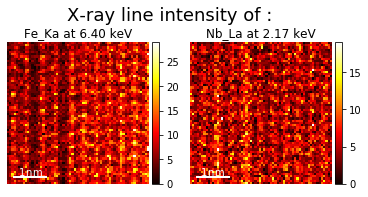

In [48]:
orig_eds_maps = orig.rebin(scale=[2**rb, 2**rb, 1]).get_lines_intensity()
hs.plot.plot_images(orig_eds_maps, axes_decor='off', scalebar='all', cmap = "hot")

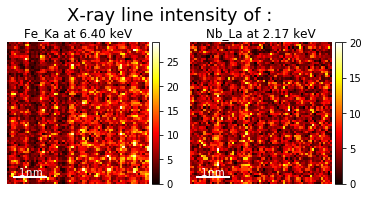

In [49]:
defo_eds_maps = defo.rebin(scale=[2**rb, 2**rb, 1]).get_lines_intensity()
hs.plot.plot_images(defo_eds_maps, axes_decor='off', scalebar='all', cmap = "hot")

## Performing PCA noise filtering

### Original dataset

In [54]:
orig.change_dtype('float64')

In [59]:
origT = orig.T
origT.decomposition()

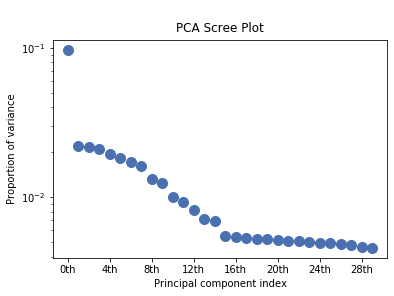

In [63]:
ax = origT.plot_explained_variance_ratio(n=30)

In [68]:
#15 components should be fine
orig_filter = origT.get_decomposition_model(15)

In [73]:
filterspec = orig_filter.T

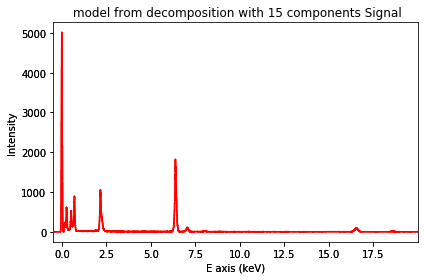

In [75]:
sumfilterspec = filterspec.sum(['x', 'y'])
sumfilterspec.plot()

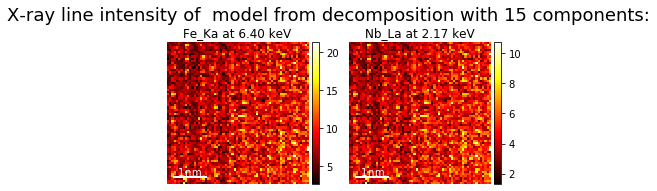

In [76]:
rb = 2
pcaorig_eds_maps = filterspec.rebin(scale=[2**rb, 2**rb, 1]).get_lines_intensity()
hs.plot.plot_images(pcaorig_eds_maps, axes_decor='off', scalebar='all', cmap = "hot")

## Doesn't look too good, let's try PCA on binned spectrumimage

In [86]:
defoT = defo.T

In [87]:
rb = 2
defoTrB = defoT.rebin(scale = [1, 2**rb, 2**rb])
defoTrB.axes_manager

<Axes manager, axes: (4096|64, 64)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               E |   4096 |      0 |   -0.48 |   0.005 |    keV 
---------------- | ------ | ------ | ------- | ------- | ------ 
               x |     64 |        |   0.026 |    0.07 |     nm 
               y |     64 |        |   0.026 |    0.07 |     nm

In [89]:
defoTrB.change_dtype('float64')

In [90]:
defoTrB.decomposition()

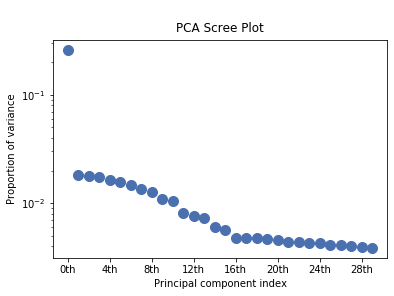

In [91]:
ax = defoTrB.plot_explained_variance_ratio(n=30)

In [93]:
#16 components should be fine
defo_filter_r = defoTrB.get_decomposition_model(16)

In [94]:
filterspec_r = defo_filter_r.T

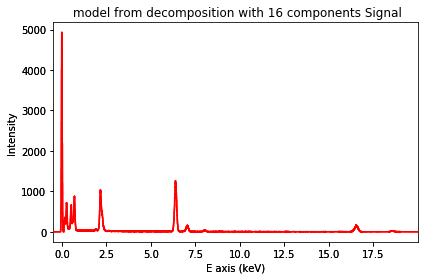

In [95]:
sumfilterspec = filterspec_r.sum(['x', 'y'])
sumfilterspec.plot()

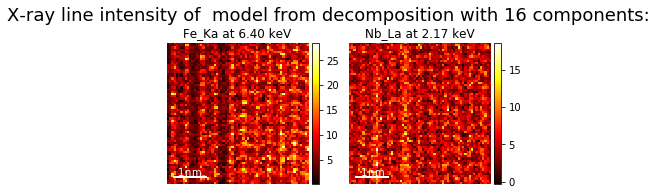

In [96]:
pcadefo_eds_maps = filterspec_r.get_lines_intensity()
hs.plot.plot_images(pcadefo_eds_maps, axes_decor='off', scalebar='all', cmap = "hot")

## Looking much much better. So: first rebin to see decent features, then apply PCA

### Repeating for deformed

In [78]:
rb = 2
origTrB = origT.rebin(scale = [1, 2**rb, 2**rb])
origTrB.axes_manager

<Axes manager, axes: (4096|64, 64)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               E |   4096 |      0 |   -0.48 |   0.005 |    keV 
---------------- | ------ | ------ | ------- | ------- | ------ 
               x |     64 |        |   0.026 |    0.07 |     nm 
               y |     64 |        |   0.026 |    0.07 |     nm

In [79]:
origTrB.decomposition()

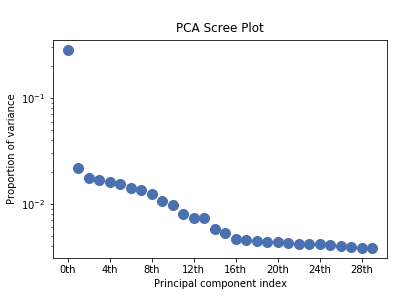

In [80]:
ax = origTrB.plot_explained_variance_ratio(n=30)

In [97]:
#16 components should be fine
orig_filter_r = origTrB.get_decomposition_model(16)

In [98]:
filterspec_r = orig_filter_r.T

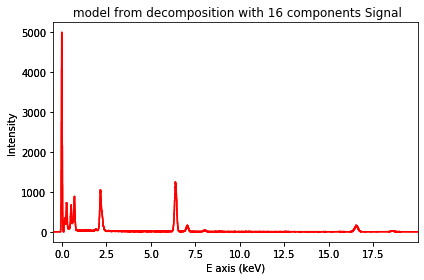

In [99]:
sumfilterspec = filterspec_r.sum(['x', 'y'])
sumfilterspec.plot()

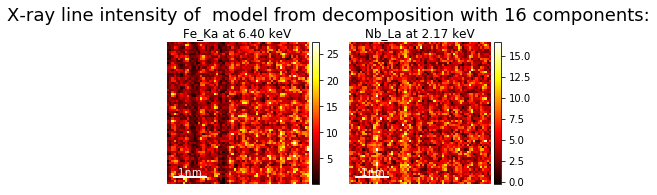

In [100]:
rb = 2
pcaorig_eds_maps_r = filterspec_r.get_lines_intensity()
hs.plot.plot_images(pcaorig_eds_maps_r, axes_decor='off', scalebar='all', cmap = "hot")

## Automatically finding peaks, doesn't work that well

In [17]:
sc = specor.isig[0.1:20.]

In [24]:
sc.plot()

In [25]:
P = sc.find_peaks1D_ohaver(parallel = True)

In [26]:
P

array([array([( 0.17084271, 12.76148449, 0.13008053),
       ( 0.27283496, 17.64827982, 0.1004445 ),
       ( 0.52498403, 16.80685762, 0.11246321),
       ( 0.6258162 , 11.25988049, 0.17546485),
       ( 0.70855172, 19.07446278, 0.10949245),
       ( 2.17558254, 20.11776879, 0.15665693),
       ( 6.39633551, 21.68144318, 0.18236599),
       ( 7.05821922,  8.95864765, 0.1565397 ),
       ( 7.05823314,  8.8730725 , 0.2290389 ),
       (16.5376756 ,  8.80969815, 0.12428546),
       (16.57148045,  8.8541514 , 0.15211145),
       (16.59145703,  8.44561431, 0.2140242 ),
       (16.60950581,  8.63028703,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])],
      dtype=object)